# Importing and Analyzing TSA Throughput data in Python

Hello! In this post I am going to show you how to get data from the TSA throughput website and analyze the results in Python. This is the website https://www.tsa.gov/coronavirus/passenger-throughput

I came across this website on a webinar and found this to be a very interesting data set to use as a leading indicator for a COVID-19 recovery. 

To start, let's import the python packages we need to do the analysis.

In [1]:
from bs4 import BeautifulSoup
import requests
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In order to retrieve the data, I am using the BeautifulSoup package to read the data table on the webiste. The following code is designed to import the contents of the webiste so that we can build a dataframe using Pandas.

In [2]:
source = requests.get('https://www.tsa.gov/coronavirus/passenger-throughput').text
soup = BeautifulSoup(source, 'lxml')

You'll need to have a basic understanding of HTML to understand the next step. Essentially, the data is stored in an HTML table and we can identify the rows based on the "tr" tag. We can pull every instance of the "tr" tag using the find_all method.

I then use a loop function to iterate through each row to create a series of nested lists based on a the new line charater 

In [3]:
row = soup.find_all("tr")

data = []
for i in row[1:]:
    string = i.get_text()
    a = string.split("\n")
    data.append(a)

print(data)

[['5/28/2020', '321,776', '2,485,770', ''], ['5/27/2020', '261,170', '2,269,035', ''], ['5/26/2020', '264,843', '2,453,649', ''], ['5/25/2020', '340,769', '2,512,237', ''], ['5/24/2020', '267,451', '2,070,716', ''], ['5/23/2020', '253,190', '2,124,825', ''], ['5/22/2020', '348,673', '2,792,670', ''], ['5/21/2020', '318,449', '2,673,635', ''], ['5/20/2020', '230,367', '2,472,123', ''], ['5/19/2020', '190,477', '2,312,727', ''], ['5/18/2020', '244,176', '2,615,691', ''], ['5/17/2020', '253,807', '2,620,276', ''], ['5/16/2020', '193,340', '2,091,116', ''], ['5/15/2020', '250,467', '2,664,549', ''], ['5/14/2020', '234,928', '2,611,324', ''], ['5/13/2020', '176,667', '2,343,675', ''], ['5/12/2020', '163,205', '2,191,387', ''], ['5/11/2020', '215,645', '2,512,315', ''], ['5/10/2020', '200,815', '2,419,114', ''], ['5/9/2020', '169,580', '1,985,942', ''], ['5/8/2020', '215,444', '2,602,631', ''], ['5/7/2020', '190,863', '2,555,342', ''], ['5/6/2020', '140,409', '2,270,662', ''], ['5/5/2020', '

In [4]:
# this code will create the dataframe from the list of lists
df = pd.DataFrame(data, columns=['Date','This Year','Last Year','Empty'])

In [5]:
print(df.dtypes)

Date         object
This Year    object
Last Year    object
Empty        object
dtype: object


Now that we've imported the data, you'll notice that the data types are objects. We need to convert that in order to manipulate and plot the date. 

For the numerical columns, we need to strip out the commas and convert it to a number.
For the dates, we just need to use the datetime package to turn it into a date

In [6]:
df['This Year'] = df['This Year'].replace(',','', regex=True)
df['Last Year'] = df['Last Year'].replace(',','', regex=True)
df['This Year'] = pd.to_numeric(df['This Year'])
df['Last Year'] = pd.to_numeric(df['Last Year'])
df['Date']= pd.to_datetime(df['Date'])

In [7]:
print(df.dtypes)

Date         datetime64[ns]
This Year           float64
Last Year           float64
Empty                object
dtype: object


That looks better! Now let's add a column to calculate the difference in passenger volume from one year ago

In [8]:
df['Percent Change'] = df['This Year'] / df['Last Year'] -1

In [9]:
print(df)

         Date  This Year  Last Year Empty  Percent Change
0  2020-05-28   321776.0  2485770.0             -0.870553
1  2020-05-27   261170.0  2269035.0             -0.884898
2  2020-05-26   264843.0  2453649.0             -0.892062
3  2020-05-25   340769.0  2512237.0             -0.864356
4  2020-05-24   267451.0  2070716.0             -0.870841
..        ...        ...        ...   ...             ...
85 2020-03-05  2130015.0  2402692.0             -0.113488
86 2020-03-04  1877401.0  2143619.0             -0.124191
87 2020-03-03  1736393.0  1979558.0             -0.122838
88 2020-03-02  2089641.0  2257920.0             -0.074528
89 2020-03-01  2280522.0  2301439.0             -0.009089

[90 rows x 5 columns]


Looks good! Now we are ready to plot the data. Let's first take a look at the volume of passengers this year compared to last year

<Figure size 432x288 with 0 Axes>

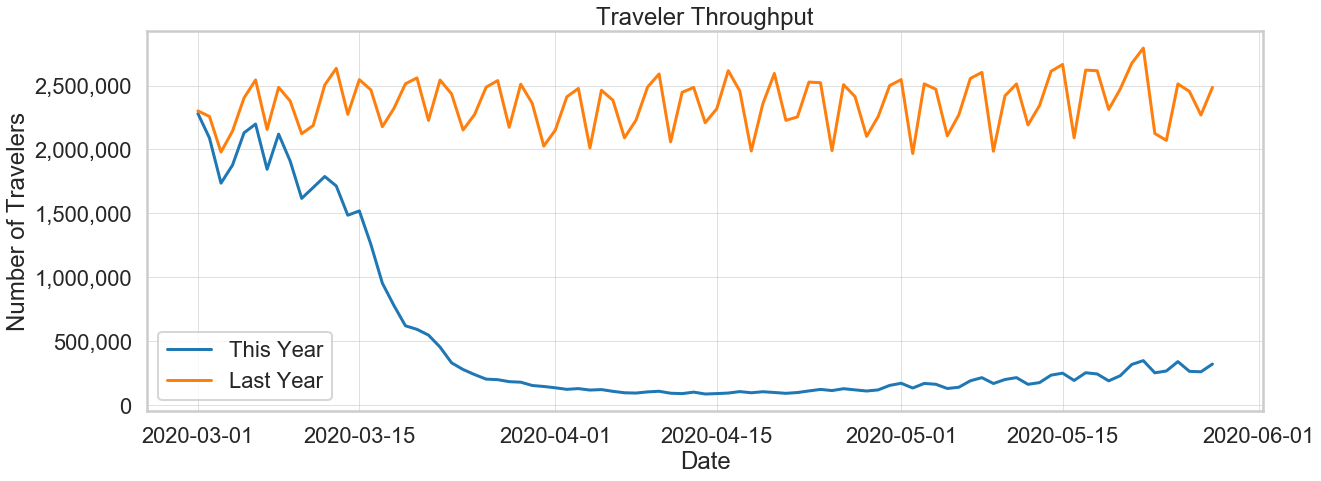

In [14]:
plt.clf()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 0.6})
f, ax = plt.subplots(figsize=(20,7))
sns.lineplot(data = df, x = 'Date', y= 'This Year')
sns.lineplot(data = df, x = 'Date', y= 'Last Year')

plt.ylabel('Number of Travelers')
plt.xlabel('Date')
plt.title('Traveler Throughput')
plt.legend(['This Year','Last Year'])

#here is how to change the format of the Y axis labels to have a comma
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


plt.show()

Quite the decline. What would make this more valuable is to understand the percent change year over year. It would also be interesting to know the low point and where we are today in order to get a sense of recovery.

<Figure size 432x288 with 0 Axes>

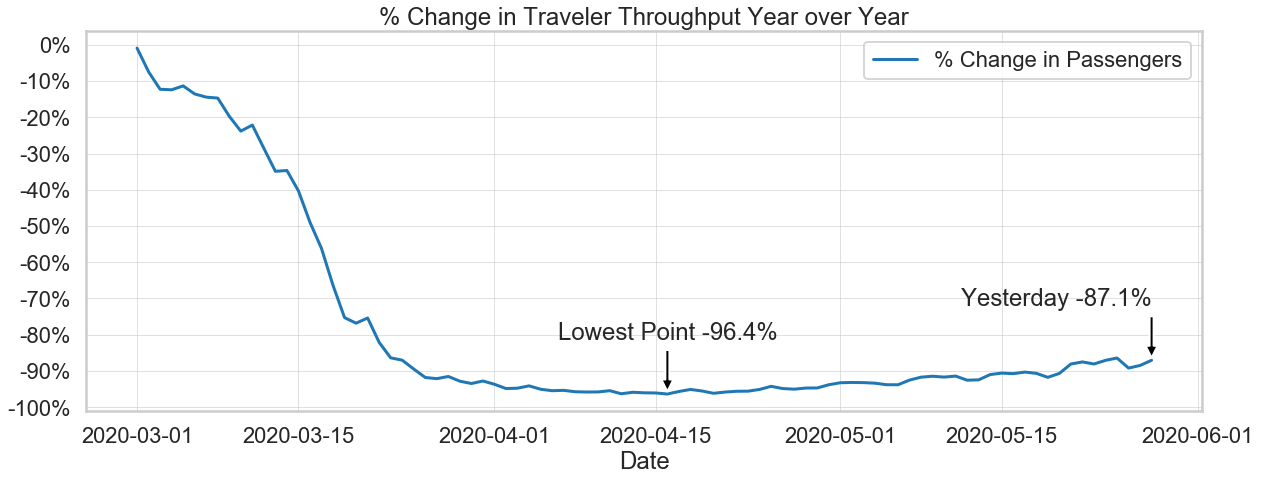

In [15]:
plt.clf()

sns.set_style("whitegrid")
#sns.set_context("poster", font_scale = .5)
f, ax = plt.subplots(figsize=(20,7))
sns.lineplot(data = df, x = 'Date', y= 'Percent Change')
plt.ylabel('')
plt.xlabel('Date')
plt.title('% Change in Traveler Throughput Year over Year')
plt.legend(['% Change in Passengers'])
ax.set_yticks(sorted([ round(i,1) for i in np.arange(-1.0,0.1,.1)],reverse=True))
#ax.set_yticks([0, -0.10, -0.20, -0.30, -0.40, -0.5, -0.60, -0.70, -0.80, -0.90, -1])

ax.set_yticklabels(['0%','-10%','-20%', '-30%', '-40%','-50%','-60%','-70%', '-80%', '-90%', "-100%"])
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 0.6})

ymin = df['Percent Change'].min()
filt = df['Percent Change'] == df['Percent Change'].min()
xmin = df.loc[filt]['Date'].min()

yrecent = df.iloc[0,4]
xrecent = df.iloc[0,0]

#show the min value
ax.annotate('Lowest Point ' + str("{:.1f}".format(ymin*100))+"%", xy=(xmin, ymin), xytext=(xmin, ymin+.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top'
            #arrowprops=dict(facecolor='black', shrink=0.05),
            )

#show the most recent value
ax.annotate('Yesterday ' + str("{:.1f}".format(yrecent*100))+"%", xy=(xrecent, yrecent), xytext=(xrecent, yrecent+.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top'
            #arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.show()

The last thing that I think would be interesting, is to combine all the data into one chart. The next example will show you how to plot multiple lines with two different Y axis.

<Figure size 432x288 with 0 Axes>

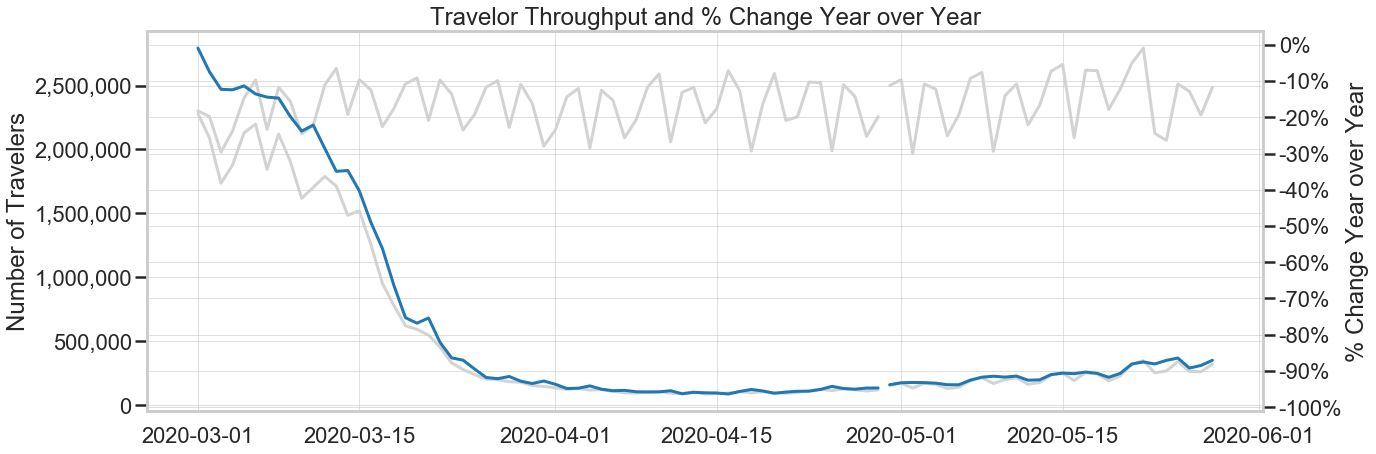

In [17]:
plt.clf()

x = df['Date']
y1 = df['Last Year']
y2 = df['This Year']
y3 = df['Percent Change']

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 0.6})

fig, ax1 = plt.subplots(figsize=(20,7))
ax1.plot(x, y1, color = '#D3D3D3')
ax1.plot(x, y2, color = '#D3D3D3')
ax1.set_ylabel('Number of Travelers')

ax1.set_title('Travelor Throughput and % Change Year over Year')
ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])


ax2 = ax1.twinx()
ax2.plot(x, y3)
ax2.set_yticks(sorted([ round(i,1) for i in np.arange(-1.0,0.1,.1)],reverse=True))
ax2.set_yticklabels(['0%','-10%','-20%', '-30%', '-40%','-50%','-60%','-70%', '-80%', '-90%', "-100%"])
ax2.set_ylabel('% Change Year over Year')

plt.show()

Looking at the combined graph, it doesn't seem to add much value because the % Change line and the Number of passengers last year are overlapping. The best view is likely to have the first and second graph on top of each other. Here's how to do that:

/Users/pauldesalvo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/Users/pauldesalvo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 432x288 with 0 Axes>

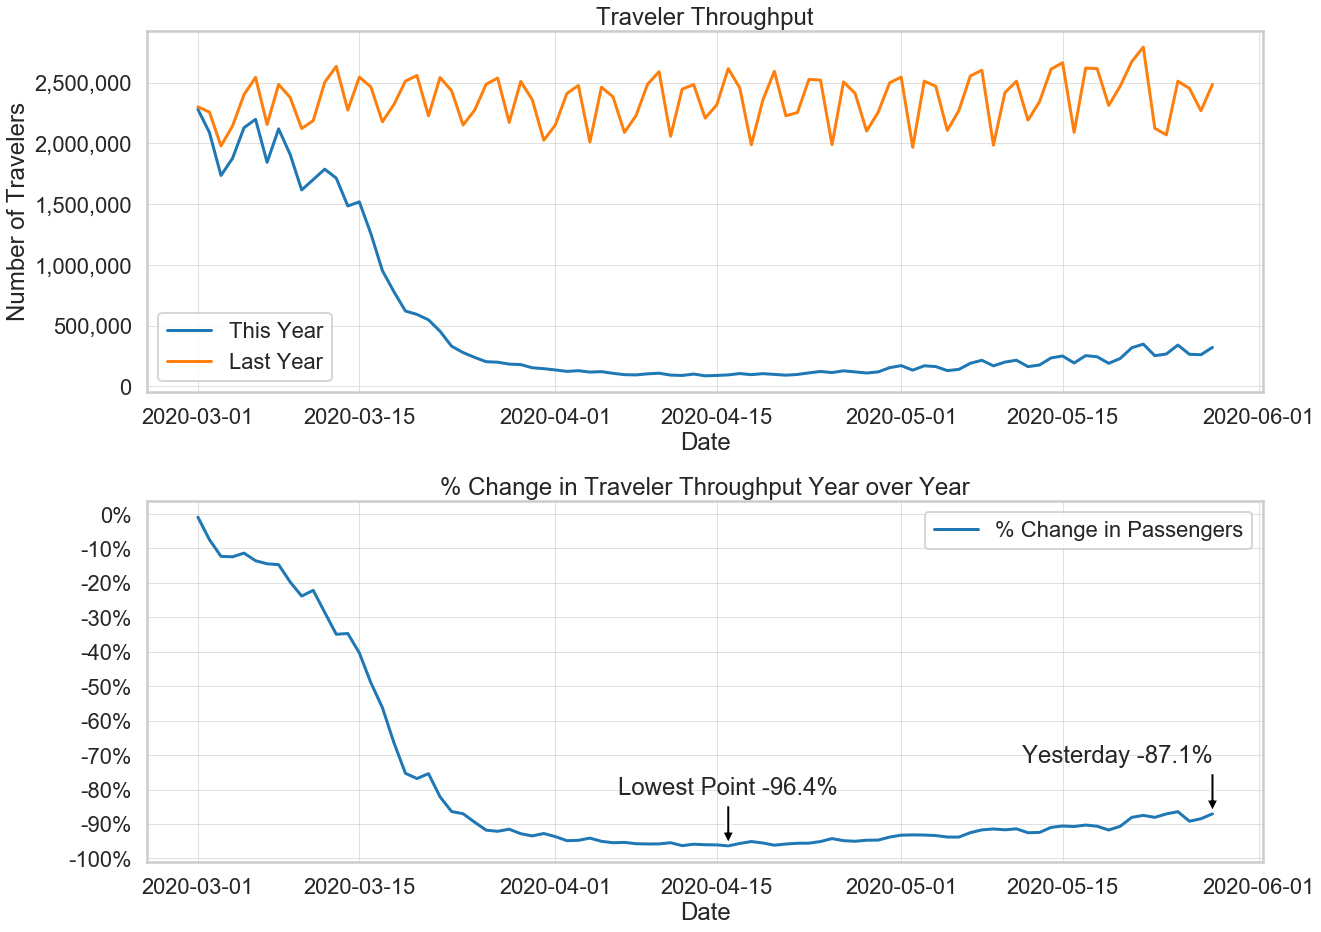

In [19]:
plt.clf()

plt.clf()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 0.6})
f, ax = plt.subplots(figsize=(20,14))
# top chart
plt.subplot(2, 1, 1)
ax = plt.subplot(2, 1, 1)
plt.subplots_adjust(top=0.95, hspace=0.3) # adds padding in between both charts
sns.lineplot(data = df, x = 'Date', y= 'This Year')
sns.lineplot(data = df, x = 'Date', y= 'Last Year')

plt.ylabel('Number of Travelers')
plt.xlabel('Date')
plt.title('Traveler Throughput')
plt.legend(['This Year','Last Year'])
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

#bottom chart
plt.subplot(2, 1, 2)
ax2 = plt.subplot(2, 1, 2)

sns.lineplot(data = df, x = 'Date', y= 'Percent Change')
plt.ylabel('')
plt.xlabel('Date')
plt.title('% Change in Traveler Throughput Year over Year')
plt.legend(['% Change in Passengers'])
ax2.set_yticks(sorted([ round(i,1) for i in np.arange(-1.0,0.1,.1)],reverse=True))


ax2.set_yticklabels(['0%','-10%','-20%', '-30%', '-40%','-50%','-60%','-70%', '-80%', '-90%', "-100%"])
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 0.6})

ymin = df['Percent Change'].min()
filt = df['Percent Change'] == df['Percent Change'].min()
xmin = df.loc[filt]['Date'].min()

yrecent = df.iloc[0,4]
xrecent = df.iloc[0,0]

#show the min value
ax2.annotate('Lowest Point ' + str("{:.1f}".format(ymin*100))+"%", xy=(xmin, ymin), xytext=(xmin, ymin+.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top'
            #arrowprops=dict(facecolor='black', shrink=0.05),
            )

#show the most recent value
ax2.annotate('Yesterday ' + str("{:.1f}".format(yrecent*100))+"%", xy=(xrecent, yrecent), xytext=(xrecent, yrecent+.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top'
            #arrowprops=dict(facecolor='black', shrink=0.05),
            )


plt.show()

Thanks for following along! If you have any suggestions about how to imporve my code, I'd love to hear it! Please post a comment below. 

To get a copy of the jupyter notebook, check out my gitbhub - https://github.com/prdesalvo/python